In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats
import warnings
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from eda import EDA
# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
eda = EDA()
train_df = pd.read_csv("../data/data.csv")
train_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

* There are 569 rows and 33 columns
* All columns are numerical except diagnosis and the 33rd column with all values null.

Check null value

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* the 32th column is null entirely so let's drop it

In [4]:
train_df.drop("Unnamed: 32",axis=1,inplace=True)

In [5]:
eda.unique_col(train_df)

id                      569
smoothness_se           547
fractal_dimension_se    545
area_worst              544
concave points_mean     542
compactness_se          541
radius_se               540
concavity_worst         539
area_mean               539
compactness_mean        537
dtype: int64

* check duplicates

In [6]:
eda.duplicate(train_df)

There are duplicates: False


Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]

DATASET DESCRIPTION

In [7]:
df = train_df.copy()
df.drop("id", axis=1, inplace=True)
eda.df_info(df)

* There is a high variation in area_mean and area_worst.
* Most columns like smothness_mean, compactness_mean, compactness_worst, concavity_worst...etc have median value of 0.
* The area_worst feature’s max value is 4254 and fractal_dimension_se features’ max 0.029840. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.

* Diagnosis types

In [8]:
pd.value_counts(train_df['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

* Diagnosis:
    - Malignant = 212
    - Benign = 357

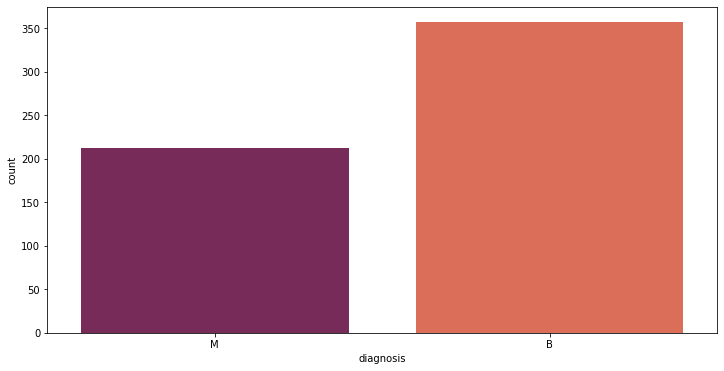

In [9]:
eda.plot_graph("diagnosis", train_df)

# DATASET EXPLORATION

## Explore with violin plot

* A violinplot is a graphical representation of data where values are depicted by color. 
* Before plotting our data we need to normalization or standardization. Because differences between values of features are very high to observe on plot. 
* We plot features in two groups and each group includes 15 features to observe better.

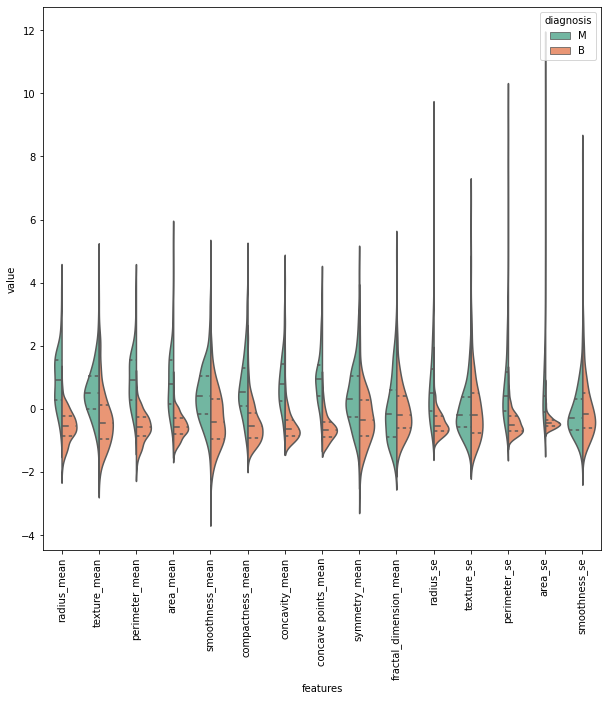

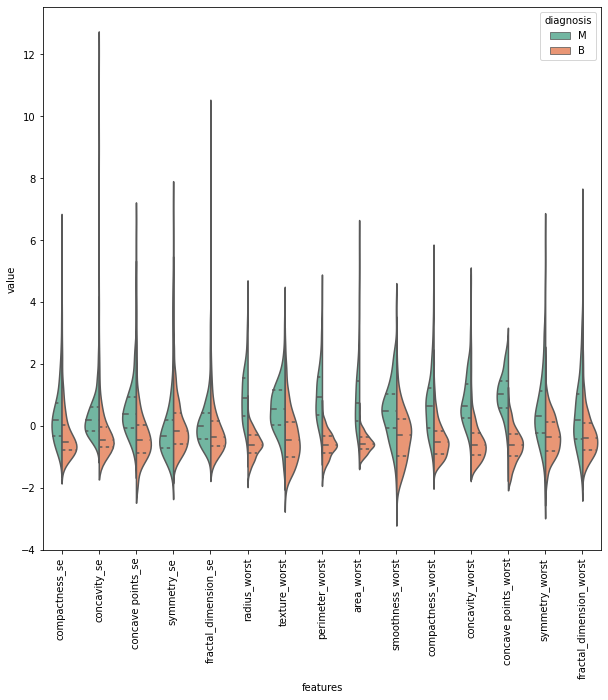

In [10]:
y = df.diagnosis
df2 = df.copy()

df2.drop("diagnosis", axis = 1, inplace= True)
eda.plot_violin(df2, y)

### Check Outliers

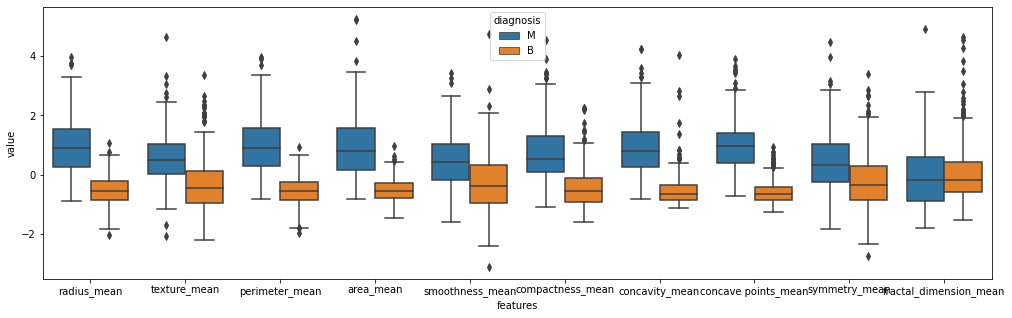

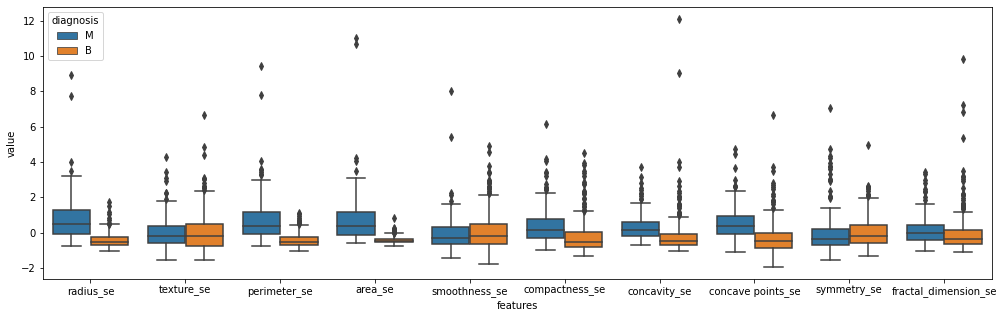

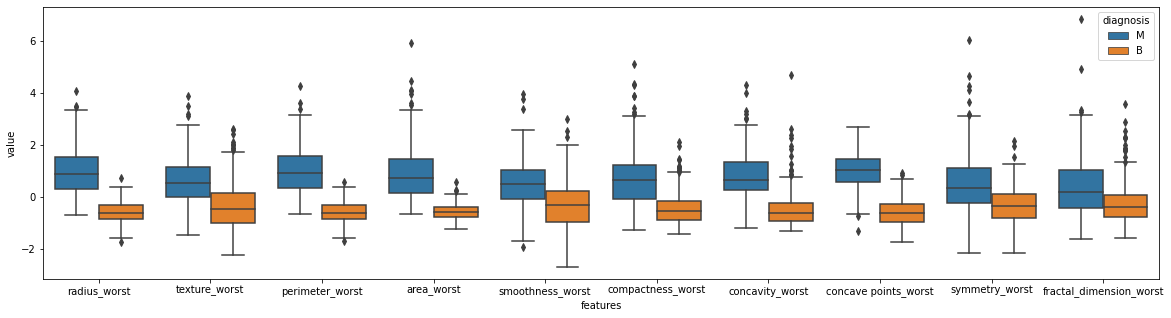

In [11]:
eda.check_outliers(df2, y)

## Explore with joint plot

* Let's look into some correlations

correlation between concavity_worts and concave points_worst

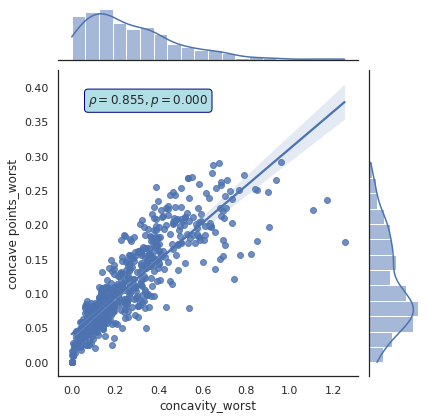

In [12]:
eda.joint_plot(df2, "concavity_worst", "concave points_worst")

correlation between raidus_mean and radius_se

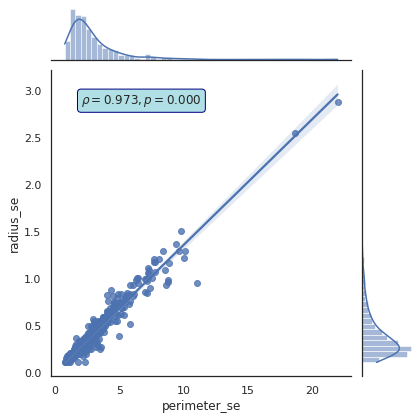

In [13]:
eda.joint_plot(df2, "perimeter_se", "radius_se")

correlation between concavity_mean and concave points_mean

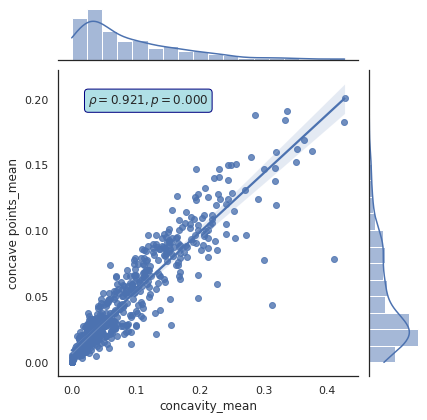

In [14]:
eda.joint_plot(df2, "concavity_mean", "concave points_mean")

correlation between concavity_se and concave points_se

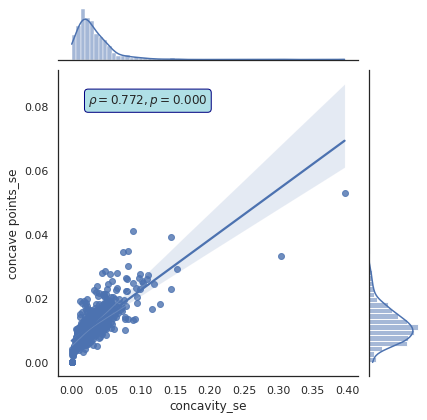

In [15]:
eda.joint_plot(df2, "concavity_se", "concave points_se")

## Explore with pairplot

the first 10 features

<Figure size 720x720 with 0 Axes>

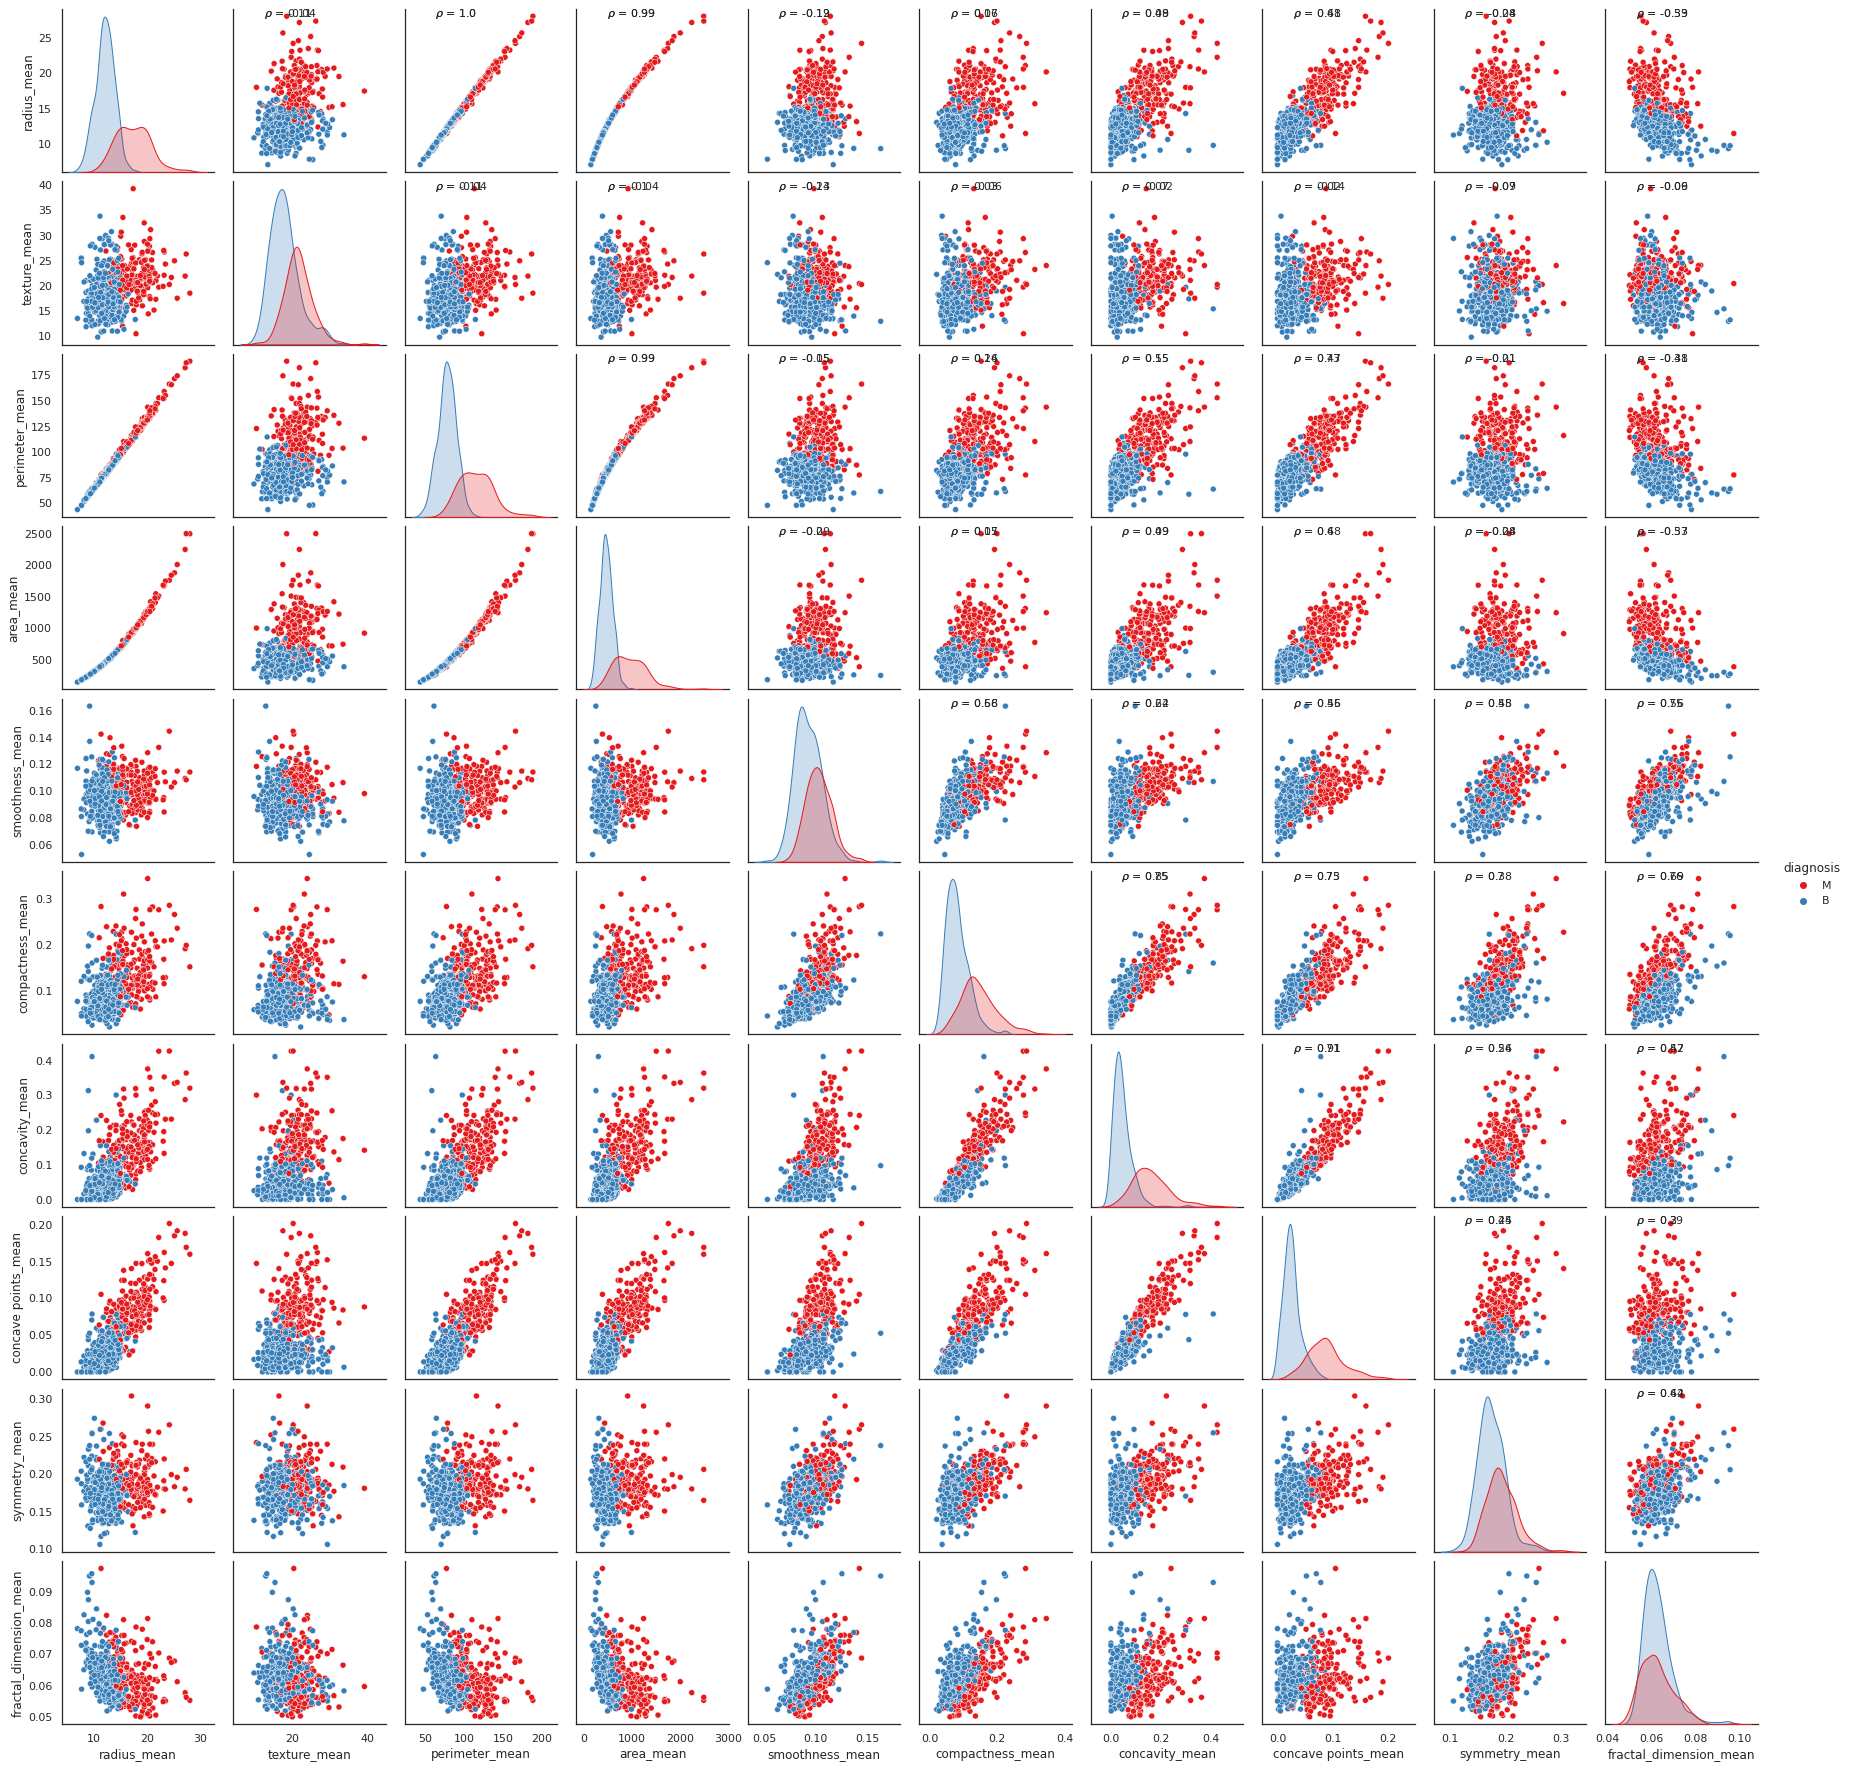

In [16]:
data = pd.concat([y,df2.iloc[:,0:10]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
grid = grid.map_upper(eda.corr)

features from 11 to 20

<Figure size 720x720 with 0 Axes>

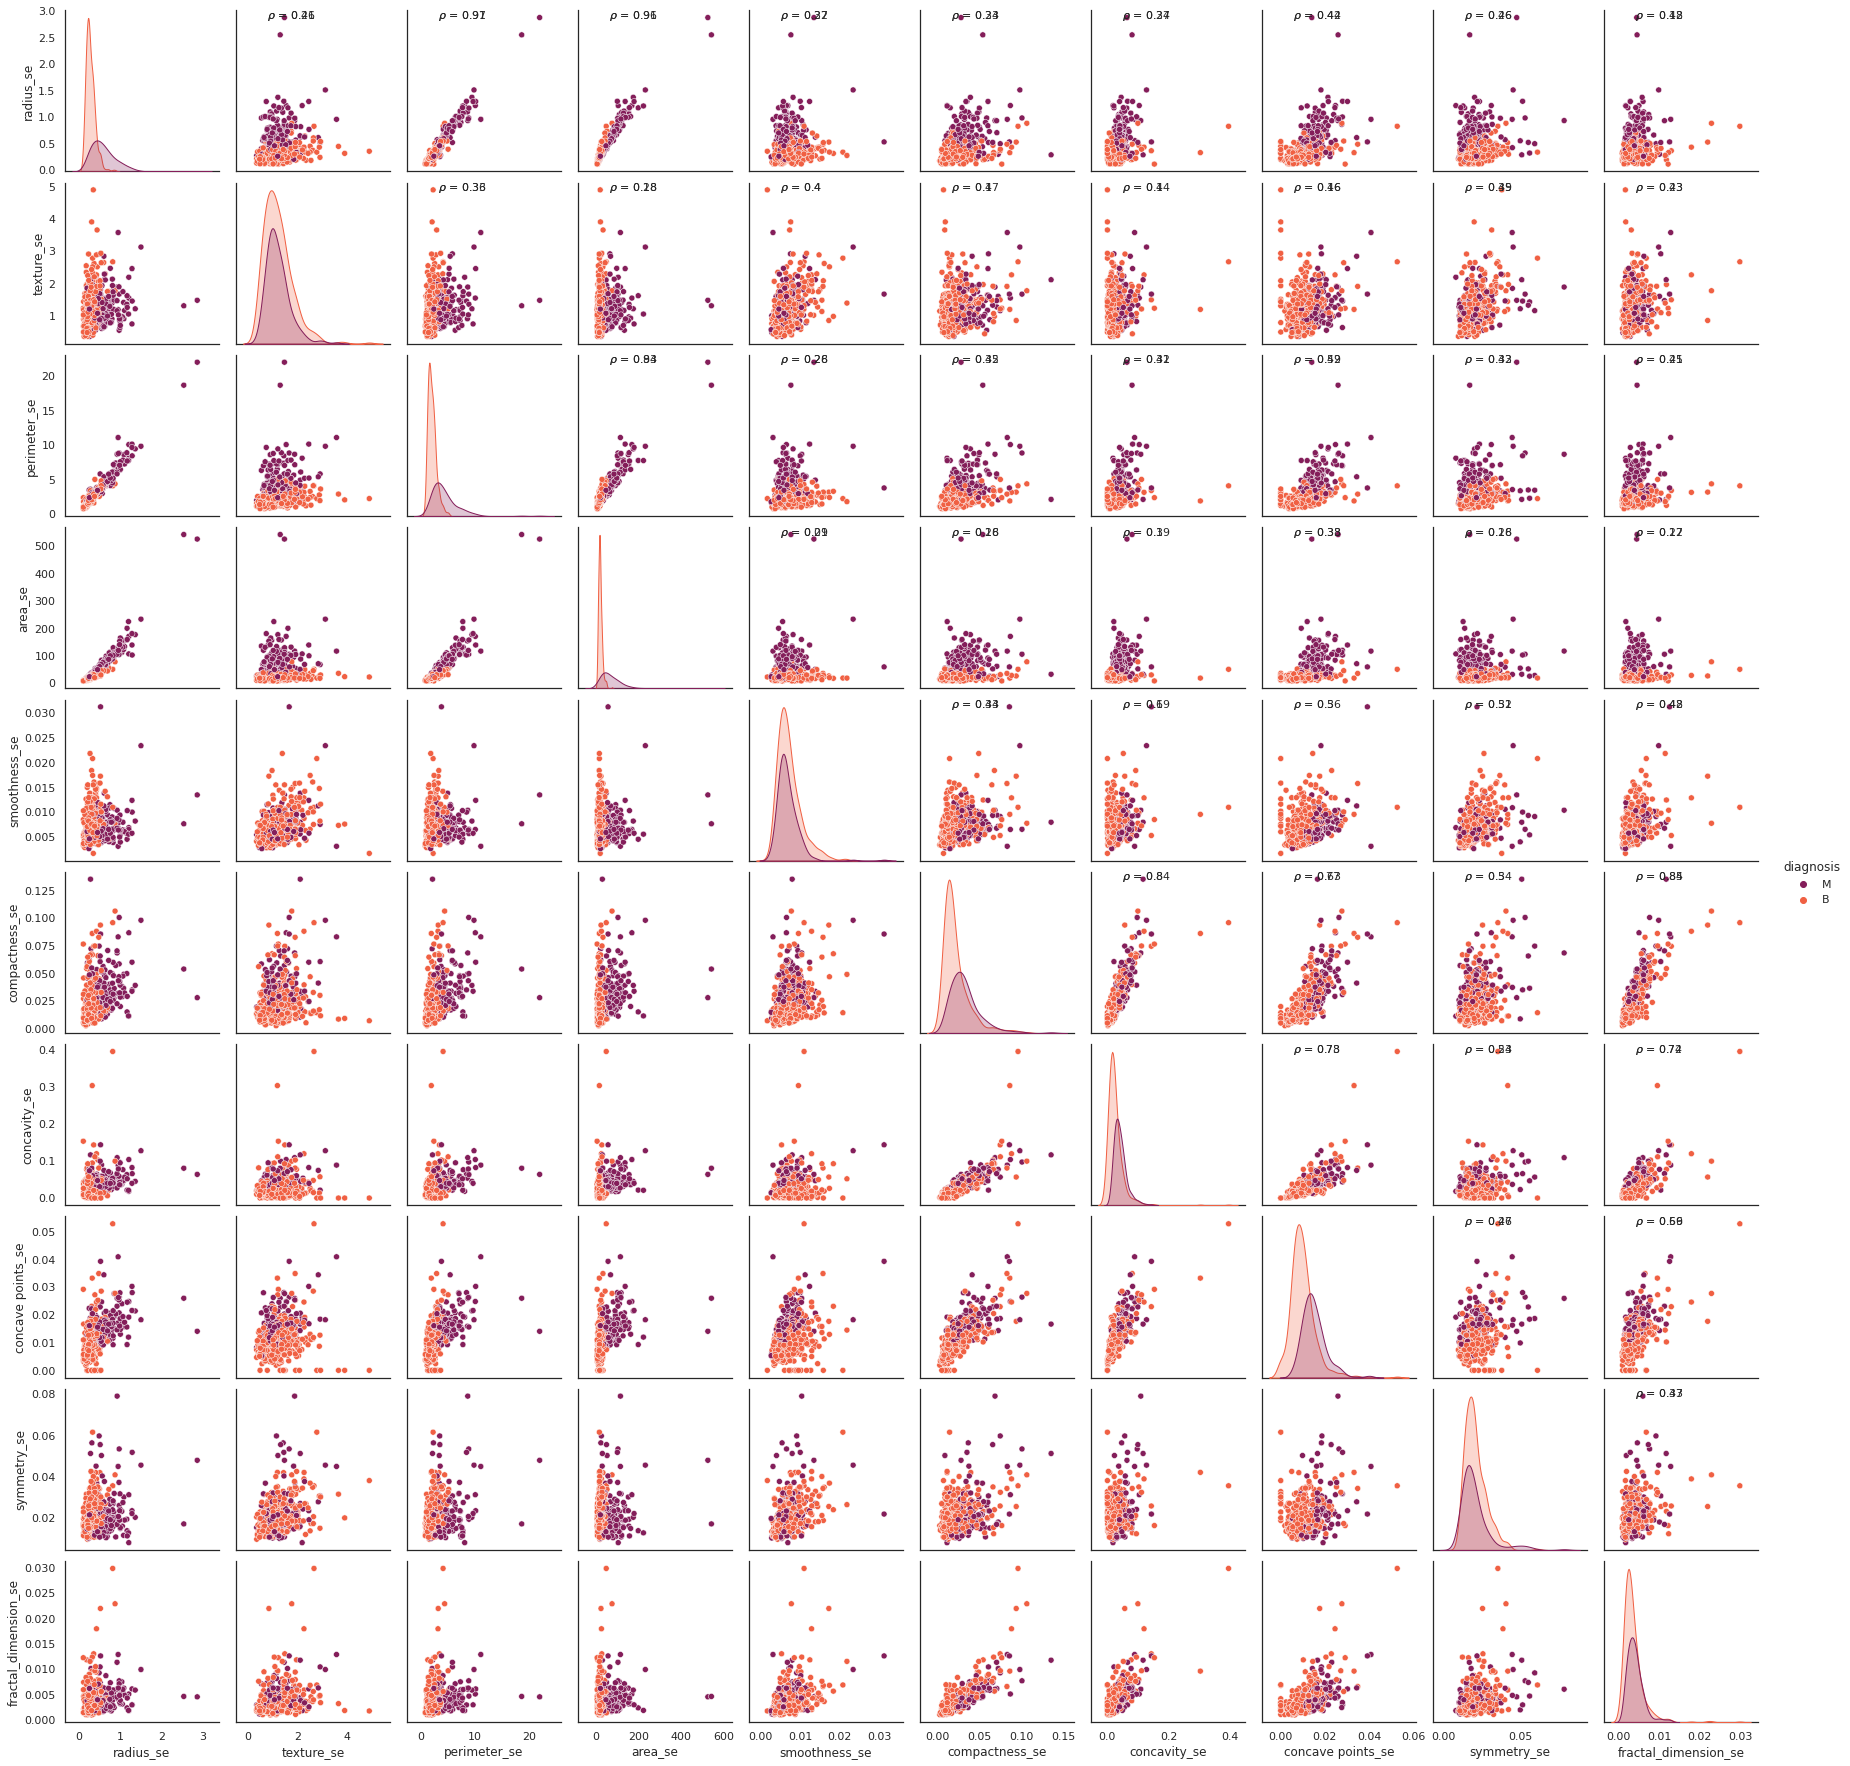

In [17]:
data = pd.concat([y,df2.iloc[:,10:20]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="rocket")
grid = grid.map_upper(eda.corr)

the last 10 features

<Figure size 720x720 with 0 Axes>

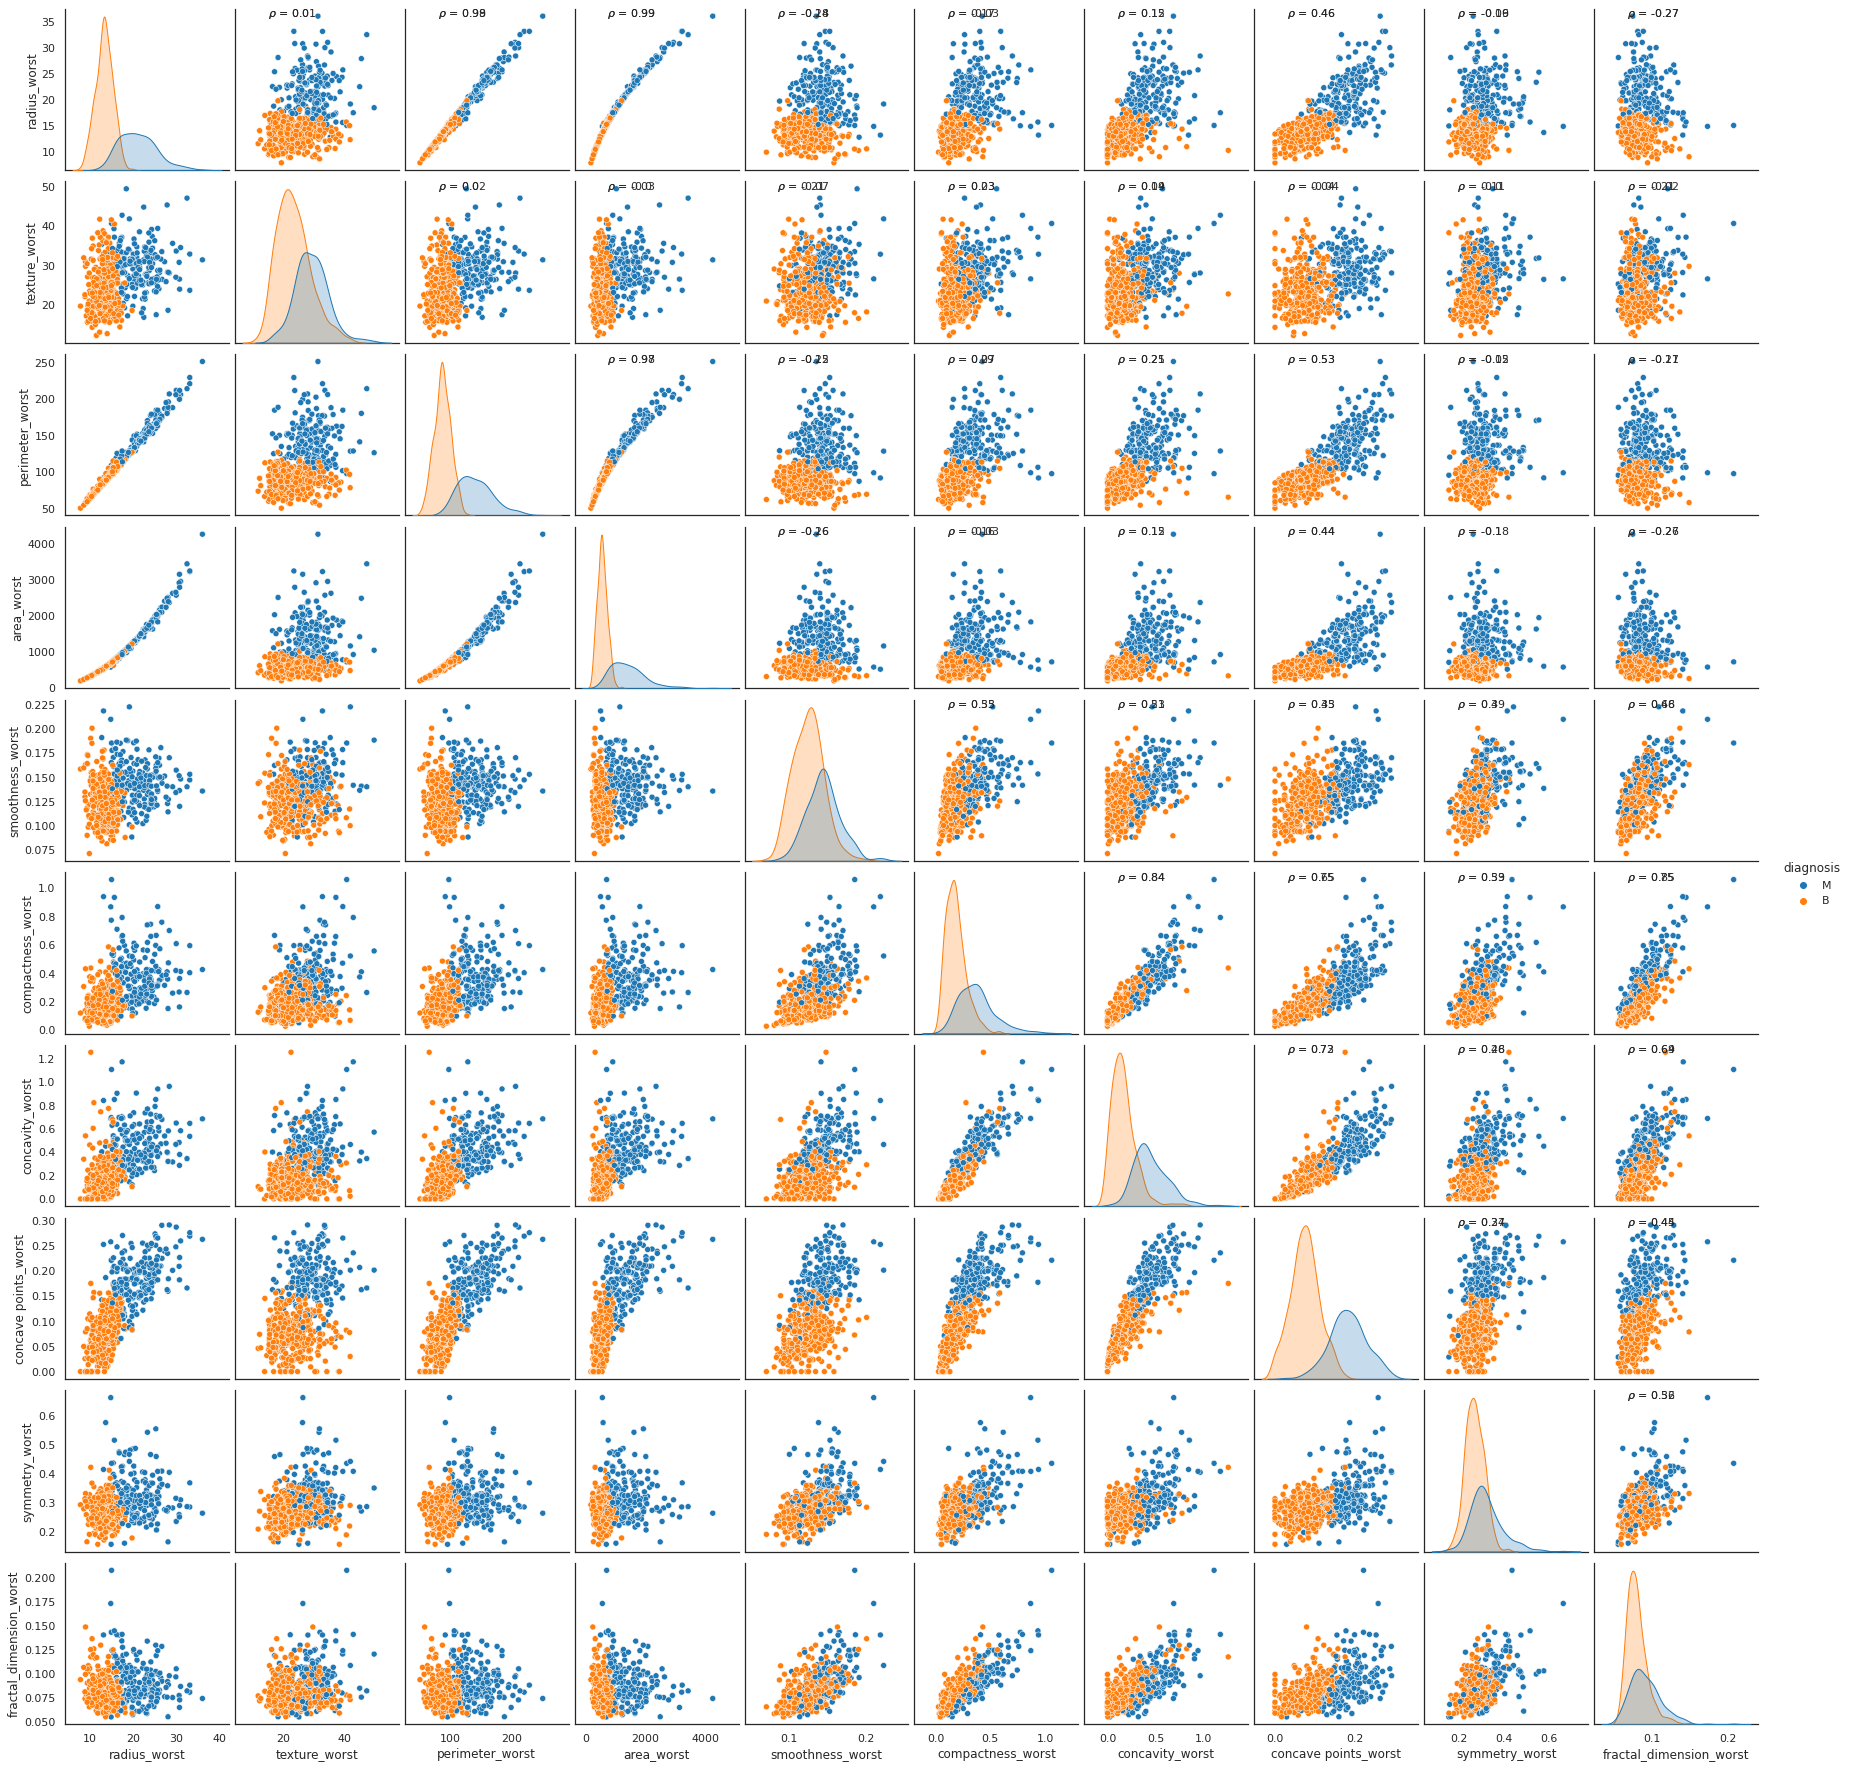

In [18]:
data = pd.concat([y,df2.iloc[:,20:30]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="tab10")
grid = grid.map_upper(eda.corr)

## Explore with heatmap

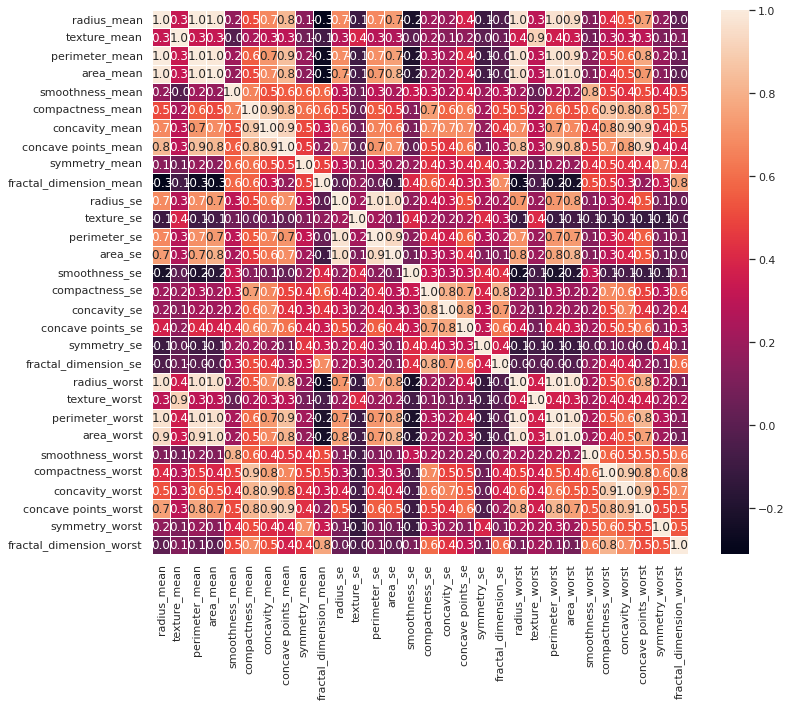

In [19]:
eda.plot_heatmap(df2)

### From violinplot, jointplot, pairplot and heatmap exploration we have observed

* plot radius_mean, perimeter_mean and area_mean are highly correlated with each other.
* Compactness_mean, concavity_mean and concave points_mean have a good positive correlation.
* radius_se, perimeter_se and area_se are correlated.
* radius_worst, perimeter_worst and area_worst are correlated.
* Compactness_worst, concavity_worst and concave points_worst are correlated.
* Compactness_se, concavity_se and concave points_se are correlated.
* texture_mean and texture_worst are correlated.
* area_worst and area_mean are correlated.

Since all the above correlations are highly positive, when we select a feature, we can select one of them, for each correlation.

### Handle Outliers

In [20]:
print("drop the following columns")
eda.handle_outlier(df2)

drop the following columns


['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

## Feature Extraction

Let's also drop most of correlated variables

In [21]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

In [22]:
df3 = df2.drop(drop_list,axis = 1 ) 

### Plot heatmap with extracted features

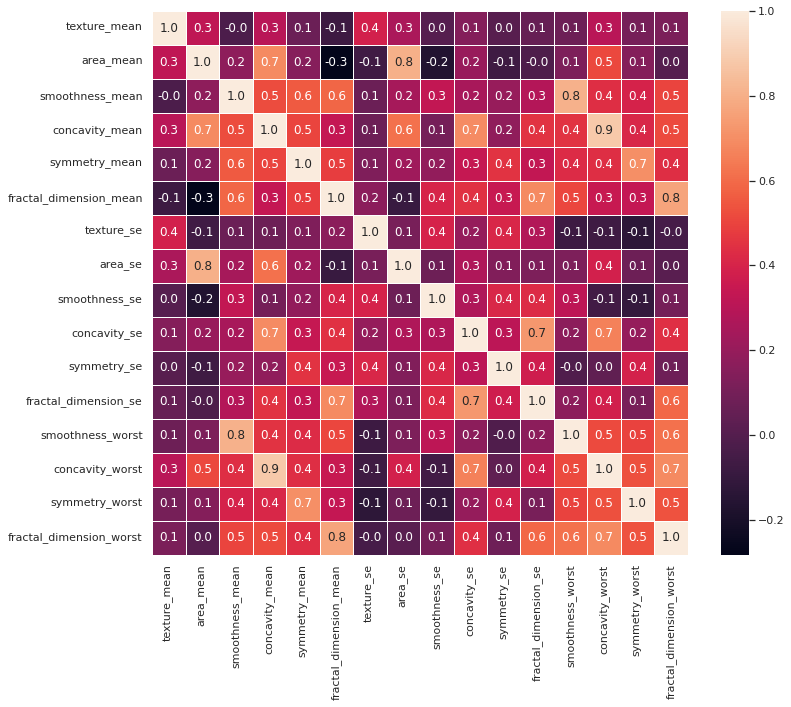

In [23]:
eda.plot_heatmap(df3)

* there is only one high correlation value 0.9 between concavity_mean and concavity_worst.

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df3)
y = train_df['diagnosis']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)
print(X_train.shape)

(455, 16)
